In [46]:
import pandas as pd

df = pd.read_csv("paphos_weather.csv")

In [47]:
df['date'] = pd.to_datetime(df["dt"], unit="s", utc=True)
 
df = df.set_index("date") 

df = df.drop(columns=["dt"]) 

In [27]:
df.columns

Index(['dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp', 'visibility',
       'dew_point', 'feels_like', 'temp_min', 'temp_max', 'pressure',
       'sea_level', 'grnd_level', 'humidity', 'wind_speed', 'wind_deg',
       'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all',
       'weather_id', 'weather_main', 'weather_description', 'weather_icon'],
      dtype='object')

In [28]:
df.index

DatetimeIndex(['2004-01-01 00:00:00+00:00', '2004-01-01 01:00:00+00:00',
               '2004-01-01 02:00:00+00:00', '2004-01-01 03:00:00+00:00',
               '2004-01-01 04:00:00+00:00', '2004-01-01 05:00:00+00:00',
               '2004-01-01 06:00:00+00:00', '2004-01-01 07:00:00+00:00',
               '2004-01-01 08:00:00+00:00', '2004-01-01 09:00:00+00:00',
               ...
               '2025-10-03 14:00:00+00:00', '2025-10-03 15:00:00+00:00',
               '2025-10-03 16:00:00+00:00', '2025-10-03 17:00:00+00:00',
               '2025-10-03 18:00:00+00:00', '2025-10-03 19:00:00+00:00',
               '2025-10-03 20:00:00+00:00', '2025-10-03 21:00:00+00:00',
               '2025-10-03 22:00:00+00:00', '2025-10-03 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=191761, freq=None)

In [53]:
year = df.resample("Y").agg(temp=("temp", "mean"))
 
 

/tmp/ipykernel_116596/1092334639.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  year = df.resample("Y").agg(temp=("temp", "mean"))


In [54]:
 year

,temp
date,
2004-12-31 00:00:00+00:00,19.422087
2005-12-31 00:00:00+00:00,19.184007
2006-12-31 00:00:00+00:00,19.209928
2007-12-31 00:00:00+00:00,19.723410
2008-12-31 00:00:00+00:00,19.705579
2009-12-31 00:00:00+00:00,19.943413
2010-12-31 00:00:00+00:00,20.617306
2011-12-31 00:00:00+00:00,19.424470
2012-12-31 00:00:00+00:00,19.933037


In [55]:
year.index = year.index.year 

In [56]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

 
X = year.index.values.reshape(-1, 1)       # predictor: year as numeric
y = year.values                                 # target: avg temp

# NumPy regression (slope, intercept)
m, b = np.polyfit(X.ravel(), y, 1)                # degree 1 linear fit
# Or scikit-learn
lr = LinearRegression().fit(X, y)
slope, intercept = lr.coef_[0], lr.intercept_

In [57]:
predicted = lr.predict(X)

year["predicted"] = predicted

In [58]:
year

,temp,predicted
date,,
2004,19.422087,19.449443
2005,19.184007,19.502764
2006,19.209928,19.556084
2007,19.723410,19.609405
2008,19.705579,19.662725
2009,19.943413,19.716046
2010,20.617306,19.769366
2011,19.424470,19.822687
2012,19.933037,19.876007


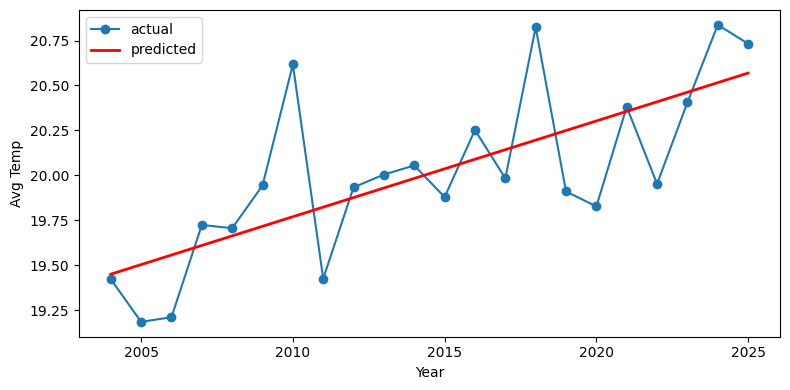

In [59]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))

 
ax.plot(year.index, year["temp"], marker="o", color="C0", label="actual")

ax.plot(year.index, year["predicted"], color="red", linewidth=2, label="predicted")

ax.set_xlabel("Year")
ax.set_ylabel("Avg Temp")
ax.legend()
plt.tight_layout()
plt.show()

